## Text Mining of Hotel Reviews



### Abstract
The objective of this project is to utilize various Text Mining techniques to attain and discover patterns, trends, and insights using the Hotel Reviews Data collected by Jiashen Liu. The outcome of this analysis will investigate the customers’ reviews word for word that is up for cleaning and analysis. The reviews, positive or negative, will provide businesses valuable information on how they can enhance the quality and comfort of the customers’ time of stay. 

### Introduction
Whenever a user or viewer visualizes a tweet, transcript, or a report, they do not realize how much of the text is being used by data professionals for research and authentication purposes. The concept of text mining is not only to “read” documents in a body of information, but to cover ground in terms of knowledge bases and open sources within the search. The items discovered at hand invoke emotions in their form of speech and reveal connections one cannot perceive from a linguistic standpoint. This creates a need for systems that can read and understand information in a manner that is scalable and dynamic. 

### Ethical ML Framework
The acknowledgements mentioned on the website indicate that all the data is readily accessible to the public as it is scraped and published through a travel agency website “Booking.com.” However, since the Hotel Reviews dataset has an open platform and collected with demographic information, many of the ethical ML framework principles do not apply. Some of those that do apply hold major implications in terms of results from the models in our notebooks. For instance, when it comes to the area of Social Impact, human impact is highlighted when it comes to businesses achieving change and sustainability in their operations. Plus having consistent flow of communication amongst staff and employees is vital in establishing stakeholder dynamics. On the other hand, when considering Accuracy and Trust, transparency is vital when insights are clearly stated and decision-making flows back-and-forth amongst stakeholders. This can be seen in the case of market research when relying on customers to provide their feedback on their experience at the hotels they have stayed (seeking their consent in completing surveys). Hence, depending on the scenario and impact of the application, there would be more stricter measures in appropriating the techniques utilized for this project.  


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from geopy.geocoders import Nominatim

import nltk
from nltk.corpus import wordnet    
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names
import pycountry
from geograpy import places
import geopy.geocoders
from geopy.geocoders import Nominatim
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc



import string

import operator
import multiprocessing
from time import time
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

import collections


english_stemmer=nltk.stem.SnowballStemmer('english')
# With the following operation we set seaborn library as plotting library.
sns.set()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%matplotlib inline

In [2]:

# Read the csv as DataFrame.
data = pd.read_csv('Hotel_Reviews.csv')
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


### Metadata
##### - Hotel_Address: Address of hotel.
##### - Review_Date: Date when reviewer posted the corresponding review.

##### - Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
##### - Hotel_Name: Name of Hotel
##### - Reviewer_Nationality: Nationality of Reviewer
##### - Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
##### - ReviewTotalNegativeWordCounts: Total number of words in the negative review.
##### - Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
##### - ReviewTotalPositiveWordCounts: Total number of words in the positive review.
##### - Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience
##### - TotalNumberofReviewsReviewerHasGiven: Number of Reviews the reviewers has given in the past.
##### - TotalNumberof_Reviews: Total number of valid reviews the hotel has.
##### - Tags: Tags reviewer gave the hotel.
##### - dayssincereview: Duration between the review date and scrape date.
##### - AdditionalNumberof_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
##### - lat: Latitude of the hotel
##### - lng: longtitude of the hotel

### Data Unterstanding and Cleaning 

In [3]:
data.describe()


,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

### Overview
In the Hotel Reviews Data, the dataset contains 515,000 customer reviews and scoring of 1493 luxury hotels across Europe compiled in the span of January 2015 to November 2017. As part of preprocessing, the owner Jiashen Liu removed Unicode and punctuation in the text data and transform text into lower case. Based on the different approaches to implement a text mining application, we utilize natural language processing and sentiment analysis to transform the text of customer reviews into data that can be used for cleaning and analysis. The reason we are performing this analysis is to improve our understanding of the corpus that has been inserted on the user-end. The results incurred from manipulating vast information can help identify entities and extract new relationships between them that would otherwise go undiscovered. The model to be developed can be used as a means of enhancing customers’ interests that subject to trial development and quality assurance based on their feedback within the years mentioned. This application could be implemented in market research surveys (physical or online) at the end of the customer’s stay at hotels to fine tune their hospitality experience for next time. 


In [5]:
len(data) #total number of reviews

515738

In [6]:
data.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [7]:
len(data.Hotel_Name.unique()) #total number of hotels being reviewed in this dataset

1492

In [8]:
# First We will identify the hotel location City and Country by 

print(data.Hotel_Address)

0          s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
1          s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
2          s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
3          s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
4          s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
                                ...                        
515733    Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...
515734    Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...
515735    Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...
515736    Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...
515737    Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...
Name: Hotel_Address, Length: 515738, dtype: object


In [9]:

data['Country'] = data.Hotel_Address.apply(lambda x: x.split(' ')[-1])
data['City'] = data.Hotel_Address.apply(lambda x: x.split(' ')[-2])
  

In [10]:
print(data.Country.unique())
print(data.City.unique())


['Netherlands' 'Kingdom' 'France' 'Spain' 'Italy' 'Austria']
['Amsterdam' 'United' 'Paris' 'Barcelona' 'Milan' 'Vienna']


In [11]:
data.Country = data.Country.str.replace('Kingdom','UK')
data.City = data.City.str.replace('United','London')


In [12]:
print(data.Country.unique())
print(data.City.unique())


['Netherlands' 'UK' 'France' 'Spain' 'Italy' 'Austria']
['Amsterdam' 'London' 'Paris' 'Barcelona' 'Milan' 'Vienna']


Next, we dive into Feature Engineering. Through feature engineering, we established various distributions of the reviews across the countries in Europe, the nationality of the reviewers who partook in the dataset, and the hotels taken in by the reviewers. All these distributions extracted features that catered to the average scores representing as key features in the predictive models ahead. By using feature engineering, we transform the given feature “space” and provide it with mathematical functions that help reduce the modelling error (repeated columns and numbers) for our given target model.


### Feature engineering

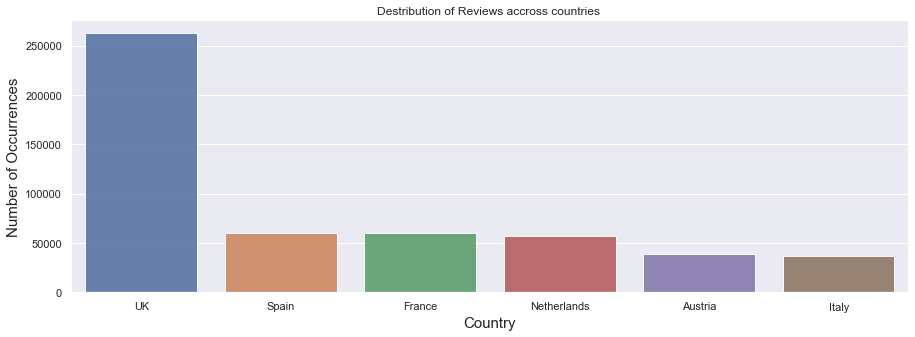

In [13]:
Country_count  = data["Country"].value_counts()
Country_count = Country_count[:10,]
plt.figure(figsize=(15,5))
sns.barplot(Country_count.index, Country_count.values, alpha=0.9)
plt.title('Destribution of Reviews accross countries ')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.show()


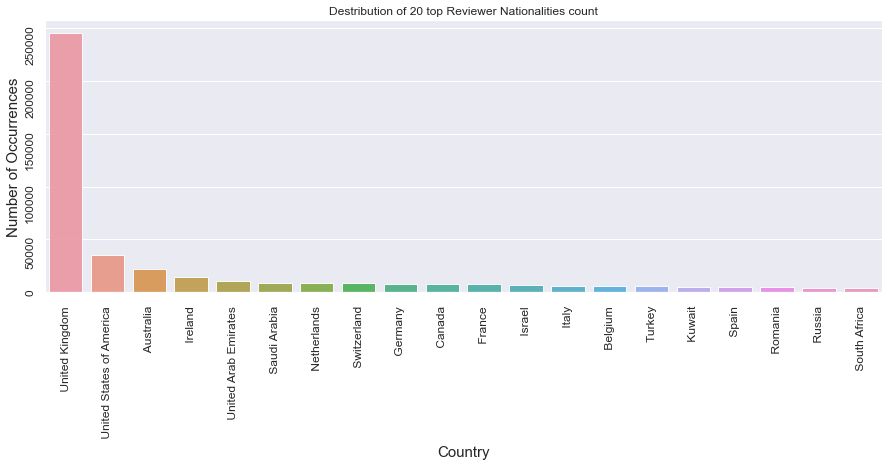

In [14]:
Reviewer_Nationality  = data["Reviewer_Nationality"].value_counts()
Reviewer_Nationality = Reviewer_Nationality[:20,]
plt.figure(figsize=(15,5))
sns.barplot(Reviewer_Nationality.index, Reviewer_Nationality.values, alpha=0.9)
plt.title('Destribution of 20 top Reviewer Nationalities count')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.tick_params(labelsize=12, rotation=90)
plt.show()

From the above 2 graphs it seems that most of the reviews are for hotels is UK and most of the reviewers are from UK 

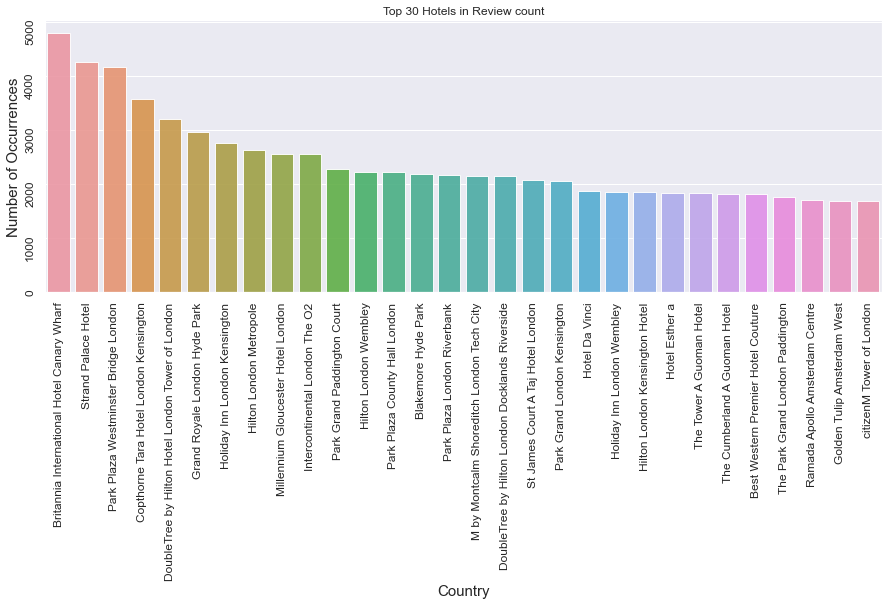

In [15]:
# We will look ar the top hotels and te scores fro them 

Hotel_Name  = data["Hotel_Name"].value_counts()
Hotel_Name = Hotel_Name[:30,]
plt.figure(figsize=(15,5))
sns.barplot(Hotel_Name.index, Hotel_Name.values, alpha=0.9)
plt.title('Top 30 Hotels in Review count')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.tick_params(labelsize=12, rotation=90)
plt.show()

In [16]:
# Looking at the average scors of the hotels across the dataset
data['Average_Score'].describe()

count    515738.000000
mean          8.397487
std           0.548048
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64

In [17]:
dataplot = pd.DataFrame(data[['Hotel_Name', 'Reviewer_Nationality','Country','Average_Score','Reviewer_Score']])


Mean_Average_Score = data.Average_Score.groupby(data.Country).mean()
Mean_Reviewer_Score = data.Reviewer_Score.groupby(data.Country).mean()

print(Mean_Average_Score)
print(Mean_Reviewer_Score)

Country
Austria        8.558034
France         8.409053
Italy          8.426729
Netherlands    8.387085
Spain          8.522812
UK             8.340393
Name: Average_Score, dtype: float64
Country
Austria        8.545047
France         8.420081
Italy          8.346722
Netherlands    8.456311
Spain          8.554092
UK             8.324138
Name: Reviewer_Score, dtype: float64


In [18]:
# Working to segregate from the Tags to understand the reviewers groups either Bussines trip or Leasure trip  
#First lets plot the word cloud fro the tags
tag = pd.Series(re.findall(r'[\']\s([\w\s]+)\s[\']',''.join(data.Tags))).value_counts()
tag.head()


Leisure trip                      417778
Submitted from a mobile device    307640
Couple                            252294
Stayed 1 night                    193645
Stayed 2 nights                   133937
dtype: int64

Furthermore, the process that provided average scores help us create Wordclouds of the reviews that highlighted the key terms associated with the purpose of the visit of the hotels in positive and negative reviews. There were however issues encountered as some negative reviews contained outliers. Hence due to this analysis we will consider the score and number of words in the review to try to eliminate these outliers as much as possible not include any text that has words less than three words for negative reviews with score more than nine and positive reviews with cord count less than three.

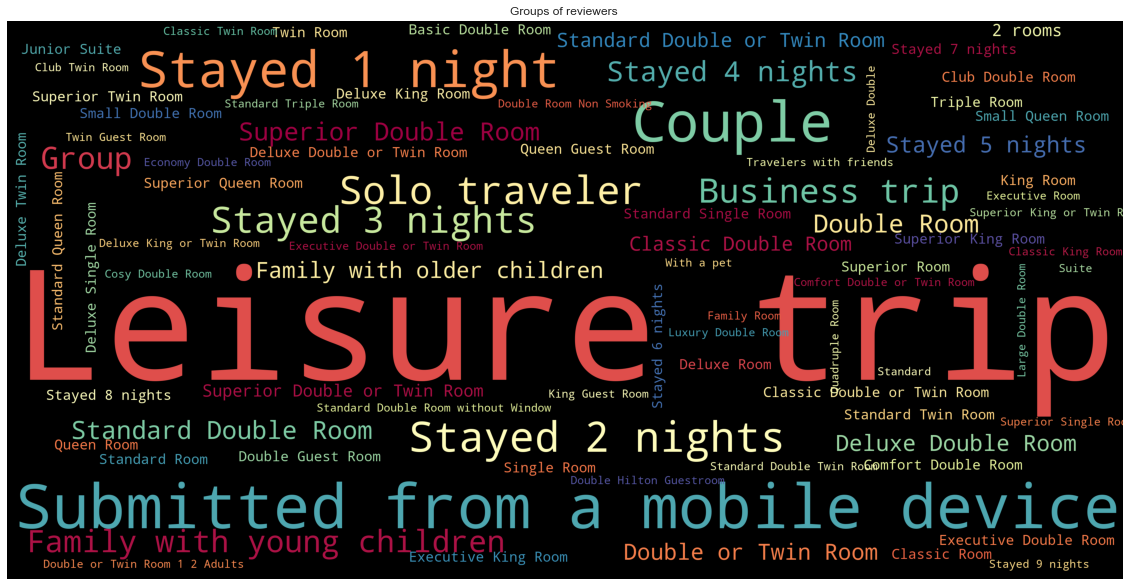

In [19]:
wordcloud = WordCloud(background_color='black', scale=10, max_font_size=70, max_words=2000, colormap="Spectral").generate_from_frequencies(tag)
wordcloud.recolor(random_state=1)
plt.figure(1, (20,16))
plt.imshow(wordcloud)
plt.title("Groups of reviewers ")
plt.axis("off")
plt.show()

Based on the outcome of the wordcloud above, "Leisure Trip" incurred the most frequencies in terms of preference/purpose of trip, followed by "Submitted from a mobile device" and "Couple"

In [20]:
data['Trip_type'] = data.Tags.apply(lambda x: x.split(' ')[1])
print(data.Trip_type.unique())
Trip_type_count = data['Trip_type'].value_counts()
print(Trip_type_count)

['Leisure' 'Business' 'Couple' 'With' 'Solo' 'Group' 'Family' 'Travelers']
Leisure      416672
Business      82748
Couple         5808
Solo           4291
Family         3158
Group          1600
With           1405
Travelers        56
Name: Trip_type, dtype: int64


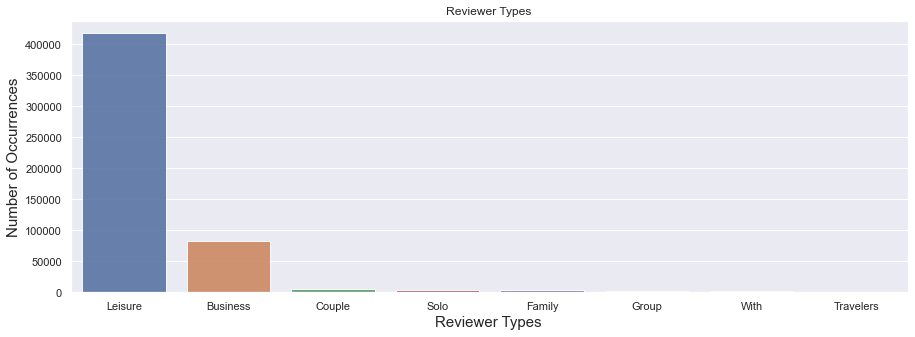

In [21]:
Trip_type  = data["Trip_type"].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(Trip_type.index, Trip_type.values, alpha=0.9)
plt.title('Reviewer Types ')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Reviewer Types ', fontsize=15)
plt.show()


We will consider any other group differen from Business is Leisure

In [22]:
data.Trip_type = data.Trip_type.str.replace('Couple','Leisure')
data.Trip_type = data.Trip_type.str.replace('Solo','Leisure')
data.Trip_type = data.Trip_type.str.replace('Family','Leisure')
data.Trip_type = data.Trip_type.str.replace('Group','Leisure')
data.Trip_type = data.Trip_type.str.replace('With','Leisure')
data.Trip_type = data.Trip_type.str.replace('Travelers','Leisure')

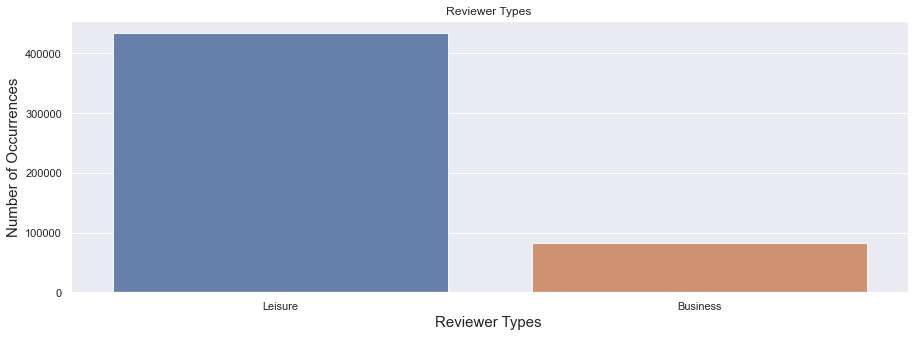

In [23]:
Trip_type  = data["Trip_type"].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(Trip_type.index, Trip_type.values, alpha=0.9)
plt.title('Reviewer Types ')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Reviewer Types ', fontsize=15)
plt.show()

In [24]:
Mean_Revie_typ_Score = data.Reviewer_Score.groupby(data.Trip_type).mean()
Mean_Avg_typ_Score = data.Average_Score.groupby(data.Trip_type).mean()
print(Mean_Revie_typ_Score)
print(Mean_Avg_typ_Score)


Trip_type
Business    7.972605
Leisure     8.475814
Name: Reviewer_Score, dtype: float64
Trip_type
Business    8.307659
Leisure     8.414654
Name: Average_Score, dtype: float64


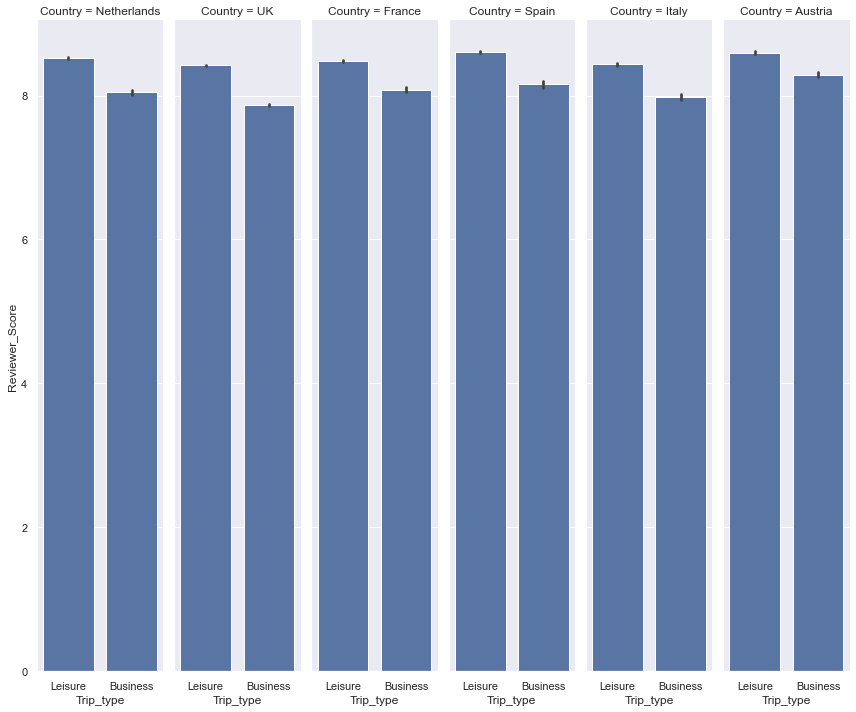

In [25]:
g = sns.FacetGrid(data, col="Country", height=10, aspect=.2)
g.map(sns.barplot, "Trip_type", "Reviewer_Score", order=["Leisure", "Business"])

<AxesSubplot:xlabel='Reviewer_Score', ylabel='Density'>

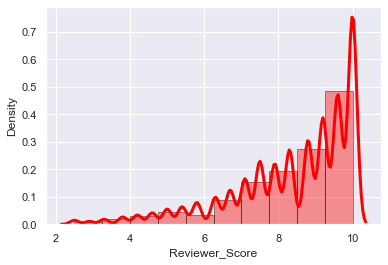

In [26]:
sns.distplot(data['Reviewer_Score'], hist=True, kde=True, 
             bins=int(10), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})



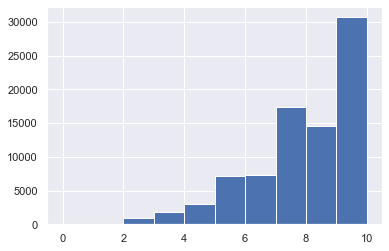

In [27]:
hist1 = plt.hist(data[data.Trip_type=='Business'].Reviewer_Score, bins = 10, range=(0,10))

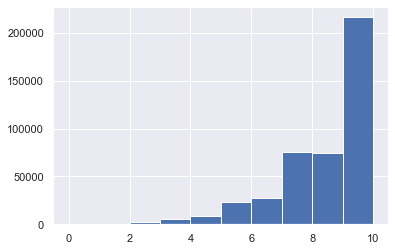

In [28]:

hist2 = plt.hist(data[data.Trip_type=='Leisure'].Reviewer_Score, bins=10, range=(0,10))



According to the graph above, as the occurences of leisure trips increase, so do the reviewer score. With the skewness the same as those of business trips, scores are likely to rise as more and more occurences incur

In [29]:
Highest_Hotel_score = (data.Reviewer_Score.groupby(data.Hotel_Name).mean()).sort_values(ascending = False)[:30]
print(Highest_Hotel_score)


Hotel_Name
Ritz Paris                                      9.725000
Hotel Casa Camper                               9.718937
41                                              9.711650
H tel de La Tamise Esprit de France             9.688525
Le Narcisse Blanc Spa                           9.671930
H10 Casa Mimosa 4 Sup                           9.660345
Hotel Eiffel Blomet                             9.646667
Hotel The Serras                                9.623474
45 Park Lane Dorchester Collection              9.603571
The Soho Hotel                                  9.597452
Haymarket Hotel                                 9.590909
Hotel Sacher Wien                               9.589231
Covent Garden Hotel                             9.587838
Milestone Hotel Kensington                      9.572093
Hotel Plaza Athenee Paris                       9.566667
Catalonia Magdalenes                            9.561415
H tel Fabric                                    9.559223
Taj 51 Buckingham Ga

In [30]:
Lowest_Hotel_score = (data.Reviewer_Score.groupby(data['Hotel_Name']).mean()).sort_values(ascending = True)[:30]
print(Lowest_Hotel_score)


Hotel_Name
Hotel Liberty                                   5.121538
Kube Hotel Ice Bar                              5.852632
Villa Eugenie                                   5.864516
Savoy Hotel Amsterdam                           6.009465
Holiday Inn Paris Montparnasse Pasteur          6.329730
Best Western Maitrise Hotel Edgware Road        6.375000
Ibis Styles Milano Palmanova                    6.383333
Villa Lut ce Port Royal                         6.385106
Hotel Cavendish                                 6.442065
The Tophams Hotel                               6.480000
Gran Hotel Barcino                              6.520732
Commodore Hotel                                 6.554355
Hallmark Hotel London Chigwell Prince Regent    6.566955
Idea Hotel Milano San Siro                      6.580086
Gainsborough Hotel                              6.676332
IH Hotels Milano Lorenteggio                    6.712270
Bloomsbury Palace Hotel                         6.736685
Henry VIII          

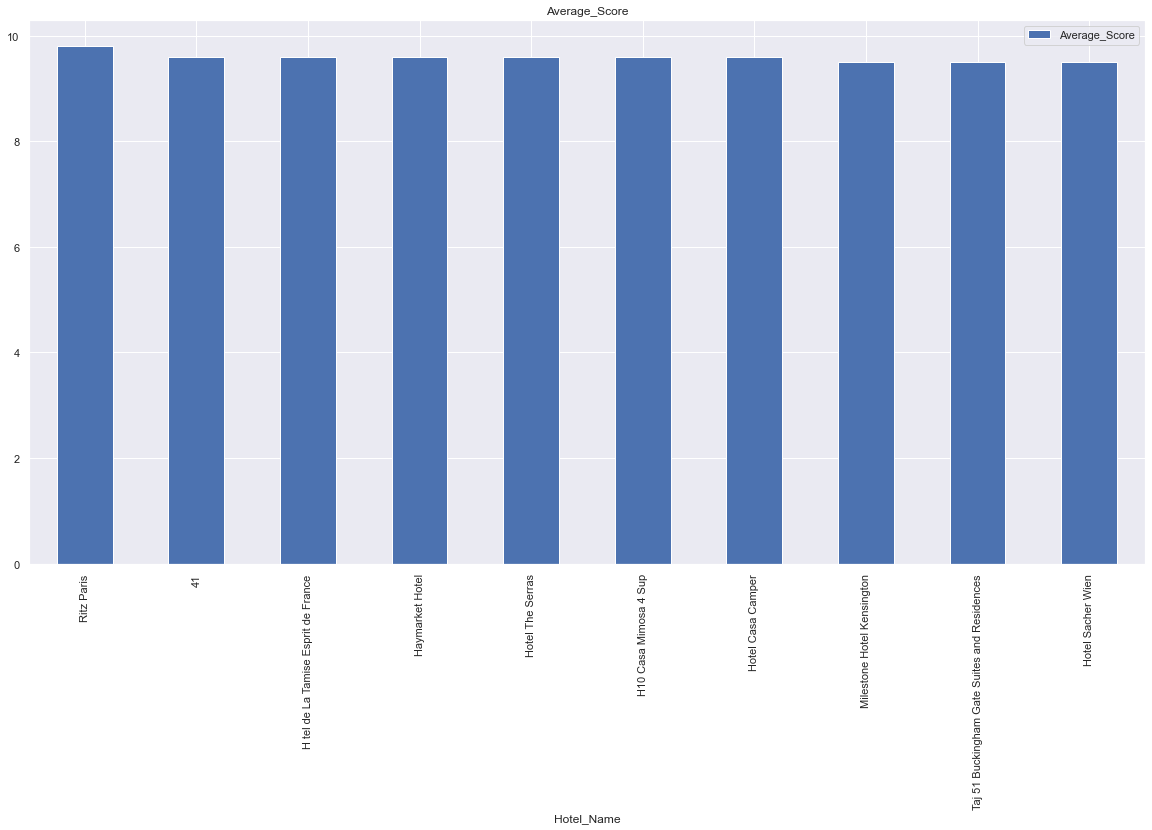

In [31]:
Best_Les_Hotels= data[(data.Trip_type == 'Leisure')][['Hotel_Name','Average_Score']].drop_duplicates()

Bes_htl_les = Best_Les_Hotels.groupby(Best_Les_Hotels['Hotel_Name']).mean().sort_values(by = 'Average_Score' ,ascending = False)[:10]

Bes_htl_les = Bes_htl_les.plot.bar(rot=90, subplots=True, figsize=(20, 10))


Based on the chart above, it appears that these hotels are ranked higher on the score scale, highlighting their major worth and a luxurious visage amongst leisure trips

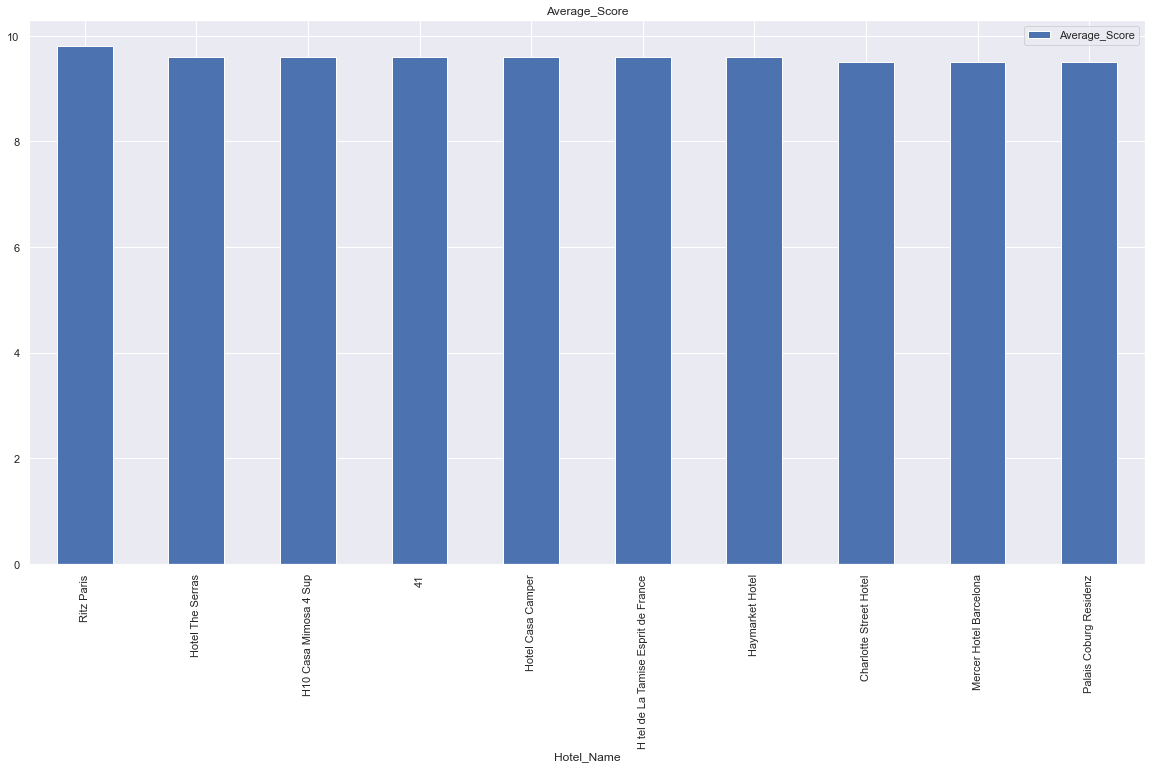

In [32]:
Best_Bes_Hotels= data[(data.Trip_type == 'Business')][['Hotel_Name','Average_Score']].drop_duplicates()

Bes_htl_bes = Best_Bes_Hotels.groupby(Best_Bes_Hotels['Hotel_Name']).mean().sort_values(by = 'Average_Score' ,ascending = False)[:10]

Bes_htl_bes = Bes_htl_bes.plot.bar(rot=90, subplots=True, figsize=(20, 10))


Based on the chart above, it appears that these hotels are ranked higher on the score scale, highlighting their major worth and a luxurious visage amongst business trips

<AxesSubplot:xlabel='Reviewer_Nationality'>

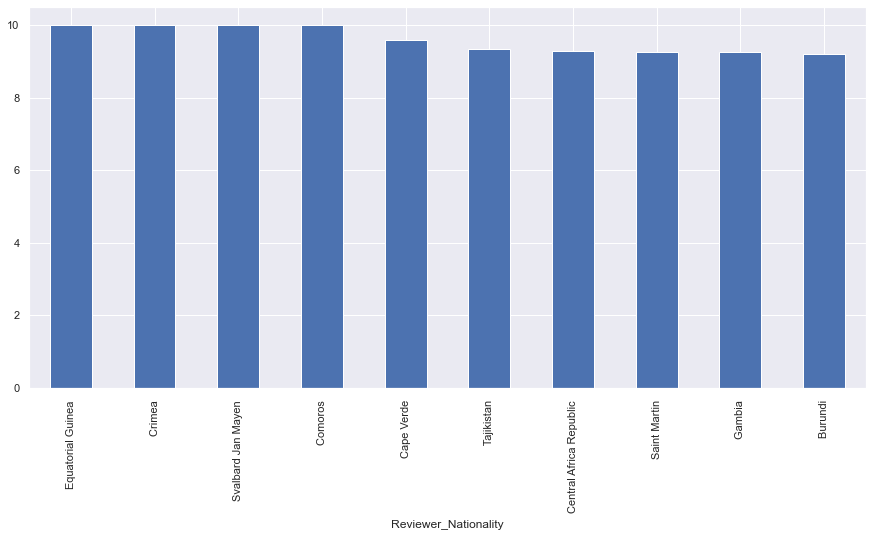

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Reviewer_Nationality']).mean()['Reviewer_Score'].sort_values(ascending = False)[:10].plot.bar(ax=ax)


Based on the chart above, it appears that top four nationalities of reviewers have been visting from countries in East Africa and Northern and Central Europe respectively

Segregation of the negtive and postive reviews

In [34]:
#let's look back at the reviewer scores
data.Reviewer_Score.describe()

count    515738.000000
mean          8.395077
std           1.637856
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64

In [35]:
data.Review_Total_Positive_Word_Counts.describe()

count    515738.000000
mean         17.776458
std          21.804185
min           0.000000
25%           5.000000
50%          11.000000
75%          22.000000
max         395.000000
Name: Review_Total_Positive_Word_Counts, dtype: float64

In [36]:
data.Review_Total_Negative_Word_Counts.describe()

count    515738.000000
mean         18.539450
std          29.690831
min           0.000000
25%           2.000000
50%           9.000000
75%          23.000000
max         408.000000
Name: Review_Total_Negative_Word_Counts, dtype: float64

In [37]:
# lets Explore the reviews very few words
data.query('Review_Total_Negative_Word_Counts < 7').head(50)[['Negative_Review', 'Review_Total_Negative_Word_Counts' ,'Positive_Review','Reviewer_Score' ]]

,Negative_Review,Review_Total_Negative_Word_Counts,Positive_Review,Reviewer_Score
1,No Negative,0,No real complaints the hotel was great great ...,7.5
10,Nothing all great,5,Rooms were stunningly decorated and really sp...,10.0
13,No Negative,0,This hotel is being renovated with great care...,9.2
15,No Negative,0,This hotel is awesome I took it sincirely bec...,10.0
18,No Negative,0,Public areas are lovely and the room was nice...,7.1
24,Nothing,3,Lovely hotel with extremely comfortable huge ...,9.6
33,Please see above,4,The hotel is going through renovations and un...,6.7
48,No Negative,0,The quality of the hotel was brilliant and ev...,10.0
52,I loved everything,5,The location in a quiet park with a great ter...,10.0
53,No Negative,0,Beautiful setting in a lovely park room very ...,10.0


In [38]:
data.query('Review_Total_Positive_Word_Counts < 7').head(50)[['Negative_Review', 'Review_Total_Positive_Word_Counts' ,'Positive_Review','Reviewer_Score' ]]

,Negative_Review,Review_Total_Positive_Word_Counts,Positive_Review,Reviewer_Score
8,Even though the pictures show very clean room...,0,No Positive,6.5
11,6 30 AM started big noise workers loading woo...,4,Style location rooms,5.8
12,The floor in my room was filfy dirty Very bas...,6,Comfy bed good location,4.6
27,Careful they are still renovating the buildin...,6,Great hotel original concept style,8.3
32,Our bathroom had an urine order Shower was ve...,0,No Positive,4.2
46,The hotel is under construction which was nev...,3,Massive bed,4.2
49,Service horrible Pillows super stiff and big ...,4,clean and new,5.4
51,When arriving I was told I had to pay 19 city...,6,The location and views,7.1
60,The place is completely mismanaged The proper...,5,The property is beautiful,4.6
65,Not being told a hedkandi night was across fr...,6,Great trip staff very friendly,8.8


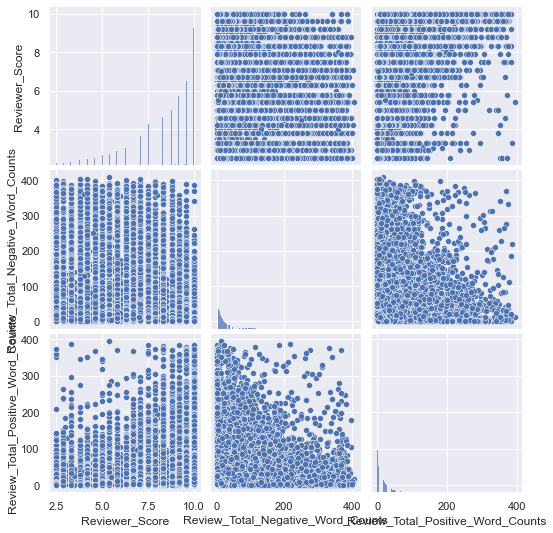

In [39]:
#let's plot number of words against reveiw score
Wrds_cnt = pd.DataFrame(data, columns =['Reviewer_Score','Review_Total_Negative_Word_Counts','Review_Total_Positive_Word_Counts'])
sns.pairplot(Wrds_cnt)

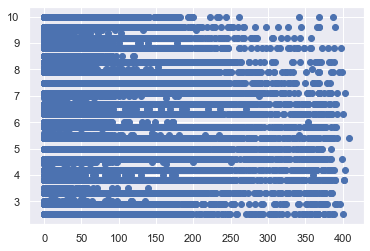

In [40]:
plt.scatter(x = Wrds_cnt.Review_Total_Negative_Word_Counts, y = Wrds_cnt.Reviewer_Score) 
plt.show()


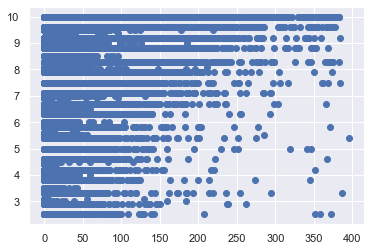

In [41]:
plt.scatter(x = Wrds_cnt.Review_Total_Positive_Word_Counts, y = Wrds_cnt.Reviewer_Score) 
plt.show()

From the above graphs it seems that reviewers tend to write more for the negtive reviews even with the higer rating scores 
also from looking at the reviewes it seems that the terms 'No Negative' and 'No Postive' are stsem genrated wich means the user did not add any comment 
so we will filter these 2 terms and replace them with emty cell  for the modeling

In [42]:
data.Negative_Review = data.Negative_Review.str.replace('No Negative',' ')
data.Positive_Review = data.Positive_Review.str.replace('No Positive',' ')

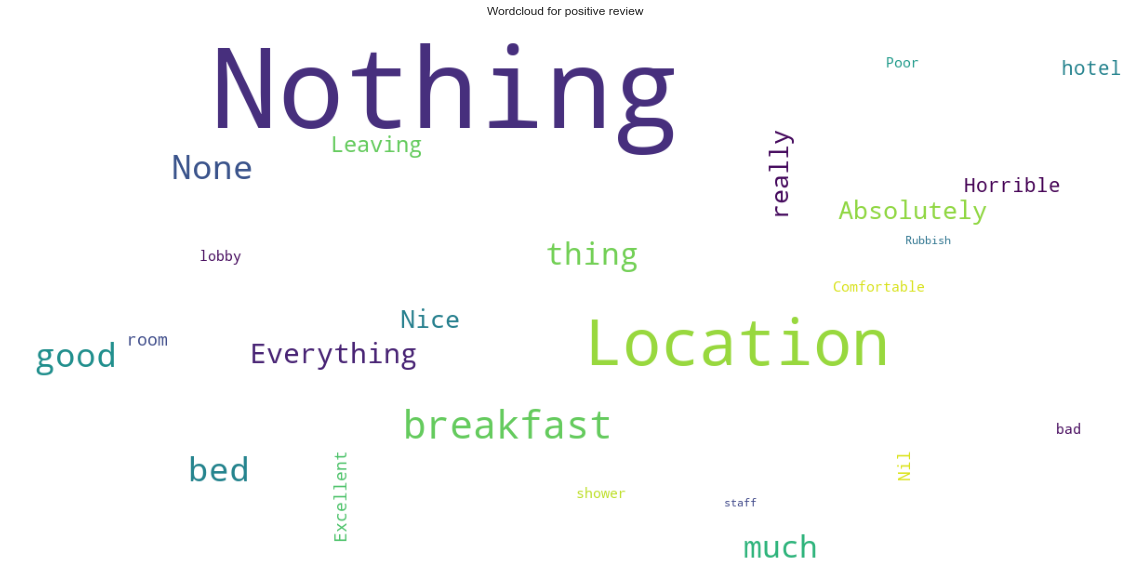

In [43]:
pos_out = data.query('Review_Total_Positive_Word_Counts <= 3 and Reviewer_Score< 3')[['Negative_Review', 'Review_Total_Positive_Word_Counts' ,'Positive_Review','Reviewer_Score' ]]
wordcloud = WordCloud(background_color='white', scale=3, max_font_size=40, max_words=25).generate_from_text(' '.join(list(pos_out['Positive_Review'])))
wordcloud.recolor(random_state=1)
plt.figure(1, (20,16))
plt.imshow(wordcloud)
plt.title("Wordcloud for positive review")
plt.axis("off")
plt.show()

The above Wordcloud show the reviews with less than 3 postive words with very low score and and the most used term is "Nothing" that is why we will try to filter such comments from the analysis so it will not have a an effect on the models 

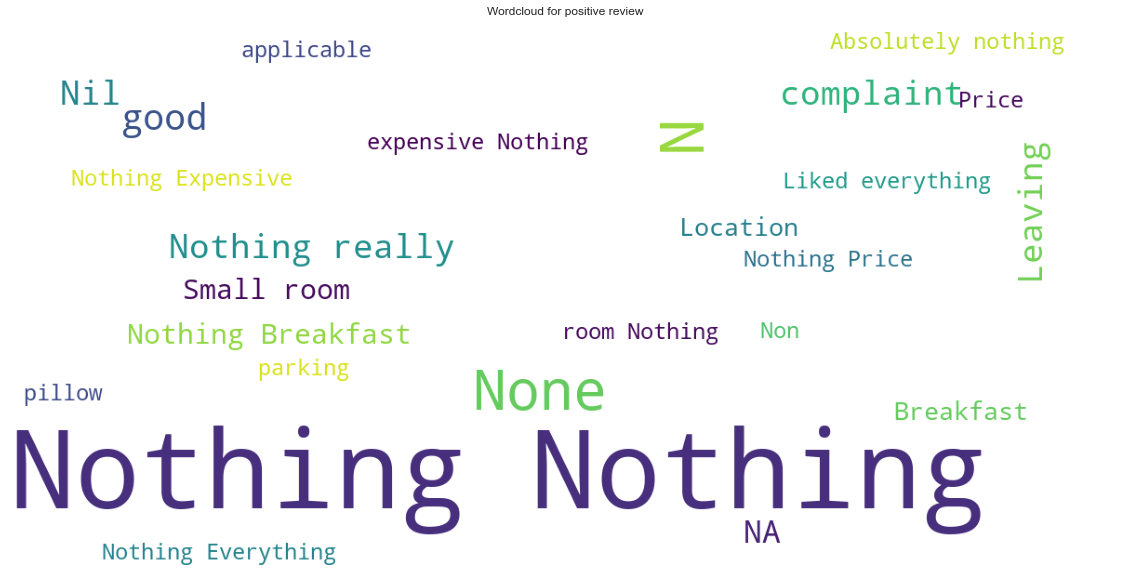

In [44]:
neg_out = data.query('Review_Total_Negative_Word_Counts <= 3  and  Reviewer_Score > 9')[['Negative_Review', 'Review_Total_Negative_Word_Counts' ,'Positive_Review','Reviewer_Score' ]]

wordcloud = WordCloud(background_color='white', scale=3, max_font_size=40, max_words=25).generate_from_text(' '.join(list(neg_out['Negative_Review'])))
wordcloud.recolor(random_state=1)
plt.figure(1, (20,16))
plt.imshow(wordcloud)
plt.title("Wordcloud for positive review")
plt.axis("off")
plt.show()

The above Wordcloud show the negative commnets we number of words less than 3 with very high score and and the most used term is "Nothing" that is why we will try to filter such comments from the analysis so it will not have a an effect on the models 

In [45]:
print(pos_out.info())
print(pos_out. Positive_Review .unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 146 to 515735
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Negative_Review                    2194 non-null   object 
 1   Review_Total_Positive_Word_Counts  2194 non-null   int64  
 2   Positive_Review                    2194 non-null   object 
 3   Reviewer_Score                     2194 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 85.7+ KB
None
[' ' ' nothing' ' Nothing' ' London' ' Nothing ' ' NOTHING' ' None'
 ' None ' ' EVERYHTING ' ' Not much' ' free wifi' ' Rubbish'
 ' horrible staff' ' Location' ' nothing ' ' the shower' ' Nothing really'
 ' Not ng' ' Wedding ceromony' ' No thing' ' The lobby'
 ' Absolutely nothing' ' the location' ' The location' ' ZERO'
 ' good breakfast' ' Nice location' ' Good breakfast' ' Fa' ' not things'
 ' Nothing Th' ' Nothink' ' Lousy hotel' 

In [46]:
neg_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126375 entries, 13 to 515732
Data columns (total 4 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Negative_Review                    126375 non-null  object 
 1   Review_Total_Negative_Word_Counts  126375 non-null  int64  
 2   Positive_Review                    126375 non-null  object 
 3   Reviewer_Score                     126375 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ MB


In [47]:
# We will creat a a new dataframe for the text analysis
Rev_text = data.query('Review_Total_Positive_Word_Counts >= 3 and Reviewer_Score>= 2.8')[['Positive_Review' , 'Reviewer_Score']]
Rev_text['Postive_text']=1
Rev_text.columns= ['Review_Text','Reviewer_Score', 'Postive_text']
Rev_text.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 457814 entries, 0 to 515737
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Review_Text     457814 non-null  object 
 1   Reviewer_Score  457814 non-null  float64
 2   Postive_text    457814 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 14.0+ MB


In [48]:
Rev_text.head(50)

,Review_Text,Reviewer_Score,Postive_text
0,Only the park outside of the hotel was beauti...,2.9,1
1,No real complaints the hotel was great great ...,7.5,1
2,Location was good and staff were ok It is cut...,7.1,1
3,Great location in nice surroundings the bar a...,3.8,1
4,Amazing location and building Romantic setting,6.7,1
5,Good restaurant with modern design great chil...,6.7,1
6,The room is spacious and bright The hotel is ...,4.6,1
7,Good location Set in a lovely park friendly s...,10.0,1
9,The room was big enough and the bed is good T...,7.9,1
10,Rooms were stunningly decorated and really sp...,10.0,1


In [49]:
Rev_neg_text = data.query('Review_Total_Negative_Word_Counts >= 4 and Reviewer_Score <= 9.8')[['Negative_Review','Reviewer_Score' ]]
Rev_neg_text['Postive_text']=0
Rev_neg_text.columns= ['Review_Text','Reviewer_Score', 'Postive_text']
Rev_neg_text.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 302216 entries, 0 to 515737
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Review_Text     302216 non-null  object 
 1   Reviewer_Score  302216 non-null  float64
 2   Postive_text    302216 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 9.2+ MB


In [50]:
Rev_neg_text.head(50)

,Review_Text,Reviewer_Score,Postive_text
0,I am so angry that i made this post available...,2.9,0
2,Rooms are nice but for elderly a bit difficul...,7.1,0
3,My room was dirty and I was afraid to walk ba...,3.8,0
4,You When I booked with your company on line y...,6.7,0
5,Backyard of the hotel is total mess shouldn t...,6.7,0
6,Cleaner did not change our sheet and duvet ev...,4.6,0
8,Even though the pictures show very clean room...,6.5,0
9,The aircondition makes so much noise and its ...,7.9,0
11,6 30 AM started big noise workers loading woo...,5.8,0
12,The floor in my room was filfy dirty Very bas...,4.6,0


In [51]:
df_rev = Rev_text.append(Rev_neg_text)

In [52]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760030 entries, 0 to 515737
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Review_Text     760030 non-null  object 
 1   Reviewer_Score  760030 non-null  float64
 2   Postive_text    760030 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.2+ MB


### Text Cleaning 
#### Natural Language Processing - Tokenize the reviews and build a bag-of-words model

In [53]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
stop = set(stopwords.words('english'))

def clean_text(text):
    # lower text.
    text = text.lower()
    
    # tokenize text and remove puncutation.
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers.
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words.
    text = [x for x in text if x not in stop]
    
    # remove empty tokens.
    text = [t for t in text if len(t) > 0]
    
    # pos tag text.
    pos_tags = pos_tag(text)
    
    # lemmatize text.
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter.
    text = [t for t in text if len(t) > 1]
    
    # join all.
    text = " ".join(text)
    return(text)

df_rev['Clean_Text'] = df_rev['Review_Text'].apply(clean_text)
df_rev.to_csv('Cleaned_Text.csv', index=False)

In [54]:
df_rev.head(20)

,Review_Text,Reviewer_Score,Postive_text,Clean_Text
0,Only the park outside of the hotel was beauti...,2.9,1,park outside hotel beautiful
1,No real complaints the hotel was great great ...,7.5,1,real complaint hotel great great location surr...
2,Location was good and staff were ok It is cut...,7.1,1,location good staff ok cute hotel breakfast ra...
3,Great location in nice surroundings the bar a...,3.8,1,great location nice surroundings bar restauran...
4,Amazing location and building Romantic setting,6.7,1,amaze location building romantic setting
5,Good restaurant with modern design great chil...,6.7,1,good restaurant modern design great chill plac...
6,The room is spacious and bright The hotel is ...,4.6,1,room spacious bright hotel locate quiet beauti...
7,Good location Set in a lovely park friendly s...,10.0,1,good location set lovely park friendly staff f...
9,The room was big enough and the bed is good T...,7.9,1,room big enough bed good breakfast food servic...
10,Rooms were stunningly decorated and really sp...,10.0,1,room stunningly decorate really spacious top b...


In [55]:
df_rev.isna().any()



Review_Text       False
Reviewer_Score    False
Postive_text      False
Clean_Text        False
dtype: bool

### Feature engineering and Sentiment analysis

In [56]:
sid_df =  df_rev.sample(frac =.03)

sid_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 22801 entries, 483748 to 295564
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review_Text     22801 non-null  object 
 1   Reviewer_Score  22801 non-null  float64
 2   Postive_text    22801 non-null  int64  
 3   Clean_Text      22801 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 890.7+ KB


In [57]:
sid_df.head(20)

,Review_Text,Reviewer_Score,Postive_text,Clean_Text
483748,Fabulous find Hotel emailed and asked what pi...,10.0,1,fabulous find hotel email ask pillow drink etc...
368508,The bed,5.0,1,bed
284096,Very comfortable bed amazing room,10.0,1,comfortable bed amazing room
48845,both my wife and I got lost so we went back t...,7.9,1,wife get lose go back hotel later stipulate ti...
504131,Comfortable room didn t use any of the other ...,7.9,1,comfortable room use hotel facility overnight ...
305050,Staff were incredibly helpful and informative...,8.8,1,staff incredibly helpful informative food rest...
242152,Location,7.1,1,location
327969,If you would like to find perfect location in...,8.3,1,would like find perfect location barcelona hot...
355523,The room size and location of the hotel was g...,7.9,1,room size location hotel good staff also reall...
507481,This hotel has a good Location and outstandin...,9.2,1,hotel good location outstanding view westminst...


### VADER Sentiment Analysis. 

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.

Why is sentiment analysis so important?
Businesses today are heavily dependent on data. Majority of this data however, is unstructured text coming from sources like emails, chats, social media, surveys, articles, and documents. The micro-blogging content coming from Twitter and Facebook poses serious challenges, not only because of the amount of data involved, but also because of the kind of language used in them to express sentiments, i.e., short forms, memes and emoticons.
Sifting through huge volumes of this text data is difficult as well as time-consuming. Also, it requires a great deal of expertise and resources to analyze all of that. Not an easy task, in short.
Sentiment Analysis is also useful for practitioners and researchers, especially in fields like sociology, marketing, advertising, psychology, economics, and political science, which rely a lot on human-computer interaction data.
Sentiment Analysis enables companies to make sense out of data by being able to automate this entire process! Thus they are able to elicit vital insights from a vast unstructured dataset without having to manually indulge with it.

In [58]:
sid = SentimentIntensityAnalyzer()
sid_df['Neg'] = 0.0
sid_df['Neu'] = 0.0
sid_df['Pos'] = 0.0
sid_df['Comp'] = 0.0

for index, row in sid_df.iterrows():
    result = sid.polarity_scores(row['Clean_Text'])
    sid_df.at[index,'Neg'] = result['neg']
    sid_df.at[index,'Neu'] = result['neu']
    sid_df.at[index,'Pos'] = result['pos']
    sid_df.at[index,'Comp'] = result['compound']



In [59]:
sid_df.head(20)



,Review_Text,Reviewer_Score,Postive_text,Clean_Text,Neg,Neu,Pos,Comp
483748,Fabulous find Hotel emailed and asked what pi...,10.0,1,fabulous find hotel email ask pillow drink etc...,0.000,0.625,0.375,0.9499
368508,The bed,5.0,1,bed,0.000,1.000,0.000,0.0000
284096,Very comfortable bed amazing room,10.0,1,comfortable bed amazing room,0.000,0.220,0.780,0.7964
48845,both my wife and I got lost so we went back t...,7.9,1,wife get lose go back hotel later stipulate ti...,0.139,0.619,0.242,0.6361
504131,Comfortable room didn t use any of the other ...,7.9,1,comfortable room use hotel facility overnight ...,0.000,0.708,0.292,0.5106
305050,Staff were incredibly helpful and informative...,8.8,1,staff incredibly helpful informative food rest...,0.000,0.424,0.576,0.7778
242152,Location,7.1,1,location,0.000,1.000,0.000,0.0000
327969,If you would like to find perfect location in...,8.3,1,would like find perfect location barcelona hot...,0.000,0.623,0.377,0.9022
355523,The room size and location of the hotel was g...,7.9,1,room size location hotel good staff also reall...,0.000,0.539,0.461,0.7178
507481,This hotel has a good Location and outstandin...,9.2,1,hotel good location outstanding view westminst...,0.000,0.420,0.580,0.7845


### TF-IDF
 short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word. The tf–idf is the product of two statistics, term frequency and inverse document frequenc

In [60]:
vectorizer_tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), max_df=1.0, 
                             min_df=10, max_features=None)
X_train_counts_tfidf = vectorizer_tfidf.fit_transform(df_rev['Clean_Text'])

In [61]:
print(X_train_counts_tfidf.shape)


(760030, 11489)


### Word2Vec

In [62]:
sent = [row.split() for row in df_rev['Clean_Text']]

In [63]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [64]:
len(phrases.vocab)

1601177

In [65]:
bigram = Phraser(phrases)

In [66]:
sentences = bigram[sent]

In [67]:

# Count the number of cores in the computer.
cores = multiprocessing.cpu_count() 
cores

8

In [68]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [69]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.73 mins


In [70]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 17.68 mins


In [71]:
w2v_model.save('w2v_model')

In [72]:
w2v_model = Word2Vec.load('w2v_model')

In [73]:
X_wv = w2v_model[w2v_model.wv.vocab]

<ipython-input-73-0e467e2f040b>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X_wv = w2v_model[w2v_model.wv.vocab]


In [74]:
X_wv.shape

(9893, 300)

In [75]:
w2v_model.wv.vocab

print(w2v_model.wv.most_similar(positive=["bedroom"]))

[('bathroom', 0.7053378224372864), ('room', 0.6507285833358765), ('en_suite', 0.5351669192314148), ('shower', 0.5151000022888184), ('smelt_musty', 0.5012235045433044), ('toilet', 0.49664899706840515), ('shower_cubicle', 0.495363712310791), ('cubicle', 0.4854569733142853), ('ensuite', 0.4834802746772766), ('small', 0.4825647175312042)]


In [76]:
print(w2v_model.wv.most_similar(positive=["smell"]))

[('smelt', 0.7130299210548401), ('smelling', 0.7024638056755066), ('odor', 0.6983328461647034), ('strong_smell', 0.6854673027992249), ('stench', 0.6745424270629883), ('odour', 0.6662341952323914), ('smelled', 0.6581301093101501), ('stank', 0.6419482231140137), ('smell_stale', 0.6371287107467651), ('stunk', 0.6257504820823669)]


In [77]:
w2v_model.wv.similarity('excellent','board')

-0.08814627

In [78]:
w2v_model.wv.similarity('expensive','bad')

0.15592173

In [79]:
w2v_model.wv.similarity('burger','steak')

0.5474285

In [80]:
w2v_model.wv.doesnt_match(['nice', 'good', 'expensive'])

'expensive'

In [81]:
w2v_model.wv.most_similar(positive=["good", "location"], negative=["resturant"], topn=3)

[('great', 0.6724668145179749),
 ('perfect', 0.6318007707595825),
 ('excellent', 0.6296056509017944)]

In [82]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 15 dimensions with PCA
    reduc = PCA(n_components=15).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

By utlizing a neural network model, the word2vec technique will help establish word assocations from these corpus of texts through numerical representations. The numerical representations will provide value that will be scalable to the models attained

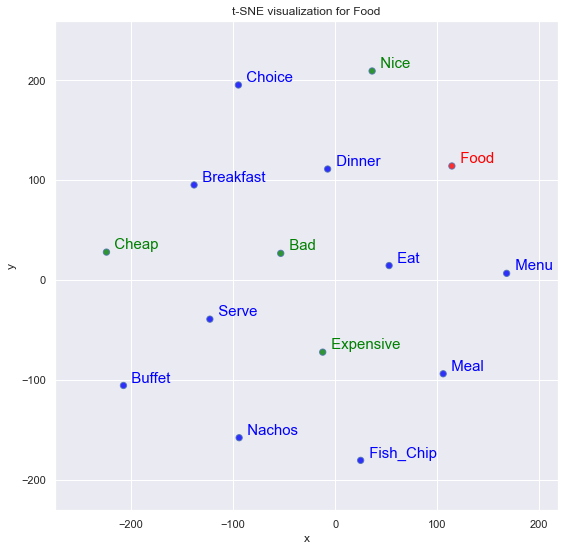

In [83]:
tsnescatterplot(w2v_model, 'food', ['bad', 'expensive', 'cheap', 'nice'])

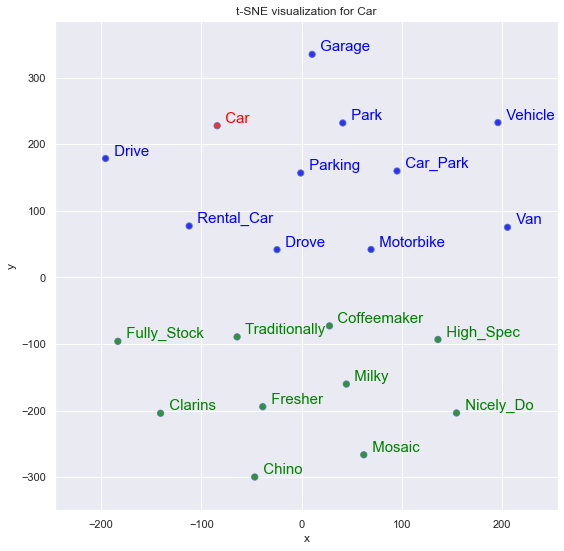

In [89]:
tsnescatterplot(w2v_model, 'car', [i[0] for i in w2v_model.wv.most_similar(negative=["car"])])

Based on the scatterplot above, if one were to add vectors for the word such as "car", it appears to be just below zero into the negative meaning that it has a weaker value as compare others such as "Rental_Car". Words highlighted in green represent correlations of positivity in value towards the actual word "Car" at hand

In [88]:
word_freq = collections.defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

70762

In [90]:
sorted_with_freq = sorted(word_freq.items(),key=operator.itemgetter(1),reverse=True)
sorted_with_freq[:15]

[('room', 379752),
 ('staff', 233951),
 ('hotel', 204586),
 ('location', 192493),
 ('breakfast', 138271),
 ('good', 134868),
 ('great', 113888),
 ('bed', 101076),
 ('friendly', 89975),
 ('helpful', 80251),
 ('clean', 79883),
 ('nice', 78815),
 ('stay', 65774),
 ('comfortable', 65116),
 ('excellent', 63847)]

In [91]:
v = sorted_with_freq[:15]
for word,freq in v:
    print(word)

room
staff
hotel
location
breakfast
good
great
bed
friendly
helpful
clean
nice
stay
comfortable
excellent



### Modeling 

We will try to do a suppervised learing model for the predection if the Raw text is postive or negtive text  then we will do another unsupervised learining modle to cluster the text based on the analysis of the WordeVec and TF-IDF

### Supervisioned Learning
#### Supervised Learning based on TF-IDF


In [92]:
#We will use the matrix extracted erlier from the TF-IDF 
X_train_counts_tfidf.shape

(760030, 11489)

### Naive Bayes with TF-IDF

In [93]:
params = {
    'alpha':[x for x in range(0, 50, 10)]
} 

# Initialize Bayes Classifier.
nb = MultinomialNB()

# We need to tune the alpha parameter, in order to do this we use GridSearchCV.
clf = GridSearchCV(nb, param_grid=params,cv=2)

# We X_train_counts_bow because svd has negative values.
x_train, x_test, y_train, y_test = train_test_split(X_train_counts_tfidf, df_rev['Postive_text'], test_size=0.3, random_state=0)
    
clf.fit(x_train, y_train)
print("Best param for alpha is {}".format(clf.best_params_))

Best param for alpha is {'alpha': 10}


In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy score: {:.5f}".format(accuracy_score(y_test, y_pred)))

[[ 78965  11630]
 [  7203 130211]]
Accuracy score: 0.91740


In [95]:
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

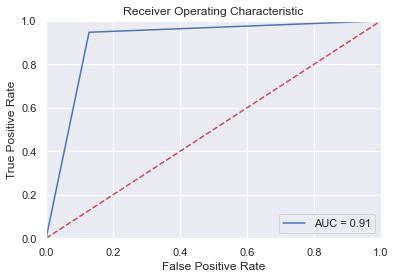

In [96]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

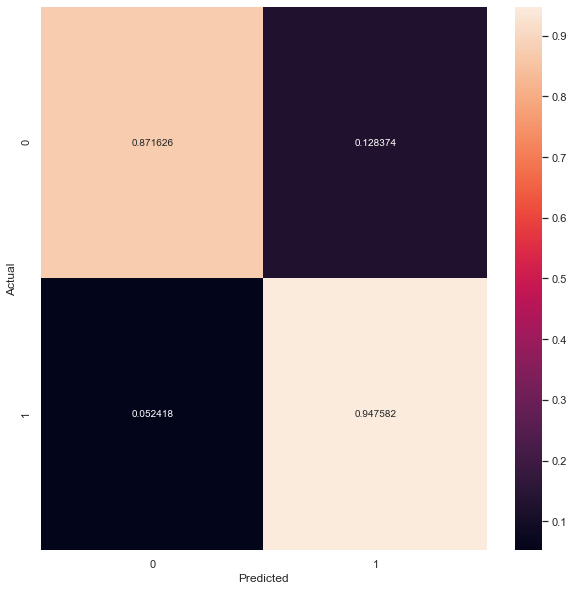

In [97]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Logistic Regression using TF-IDF

In [98]:
X_train_counts_tfidf

x_train, x_test, y_train, y_test = train_test_split(X_train_counts_tfidf, df_rev['Postive_text'], test_size=0.3, random_state=55000)

In [99]:
print(x_train.shape)
print(y_train)
print(x_test.shape)
print(y_test.shape)

(532021, 11489)
276162    1
146525    1
324711    0
364216    0
452105    1
         ..
264295    1
298295    0
176942    1
4350      1
171774    1
Name: Postive_text, Length: 532021, dtype: int64
(228009, 11489)
(228009,)


In [100]:
X_train_counts_tfidf


<760030x11489 sparse matrix of type '<class 'numpy.float64'>'
	with 8193553 stored elements in Compressed Sparse Row format>

In [101]:
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(x_train, y_train)
y_predict_lr = LR_model.predict(x_test)

In [102]:
print('\nConfusion matrix\n',confusion_matrix(y_test, y_predict_lr))
print(classification_report(y_test, y_predict_lr))


Confusion matrix
 [[ 84044   6717]
 [  8106 129142]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     90761
           1       0.95      0.94      0.95    137248

    accuracy                           0.93    228009
   macro avg       0.93      0.93      0.93    228009
weighted avg       0.94      0.93      0.94    228009



In [103]:
probs = LR_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_predict_lr)
roc_auc = auc(fpr, tpr)

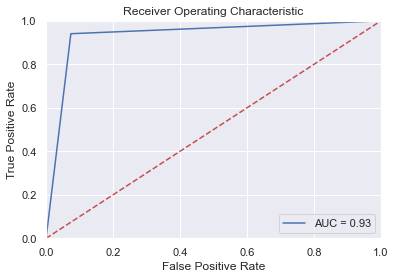

In [104]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

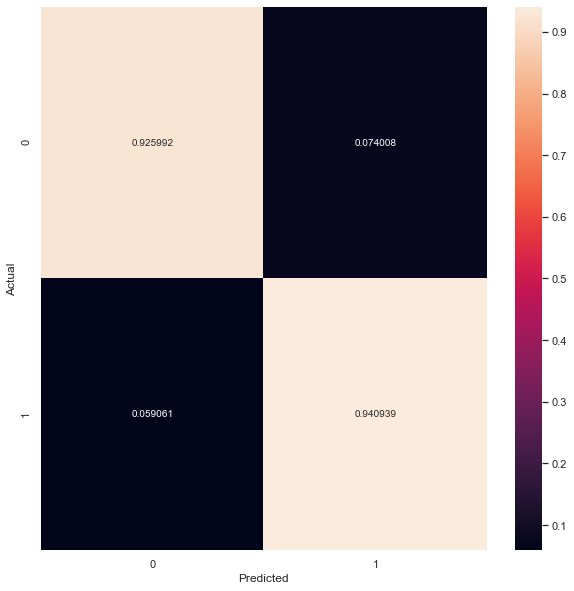

In [105]:
conf_mat = confusion_matrix(y_test, y_predict_lr)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Supervised Learning based on Word2Vec

In [106]:
len(sentences)

760030

In [107]:
def sentence_vectors(model, sentences):
    #Collecting words that are known to the model    
    model_voc = set(model.wv.vocab.keys()) 
    
    X = []
    
    for sentence in sentences:
                
        # Empty array of zeros.
        sent_vector = np.zeros(model.vector_size, dtype="float32")

        # Use a counter variable for number of words in a text
        nwords = 0
        
        # Sum up all words vectors that are know to the model
        for word in sentence:
            if word in model_voc: 
                sent_vector += model[word]
                nwords += 1.

        # Now get the average
        if nwords > 0:
            sent_vector /= nwords
        X.append(sent_vector)
    return X

X_vw = sentence_vectors(w2v_model, sentences)

<ipython-input-107-c9bcfe8d30c1>:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sent_vector += model[word]


the Array to be used in the modles is X_vw

### Logistic  Regression with Word2 Vector

In [108]:
x_train_wv, x_test_wv, y_train_wv, y_test_wv = train_test_split(X_vw, df_rev['Postive_text'], test_size=0.3, random_state=55000)

In [109]:
LR_model_wv = LogisticRegression(solver='lbfgs')
LR_model_wv.fit(x_train_wv, y_train_wv)
y_predict_lr_wv = LR_model_wv.predict(x_test_wv)

In [110]:
print('\nConfusion matrix\n',confusion_matrix(y_test_wv, y_predict_lr_wv))
print(classification_report(y_test_wv, y_predict_lr_wv))


Confusion matrix
 [[ 82920   7841]
 [  8281 128967]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     90761
           1       0.94      0.94      0.94    137248

    accuracy                           0.93    228009
   macro avg       0.93      0.93      0.93    228009
weighted avg       0.93      0.93      0.93    228009



In [111]:
probs_wv = LR_model_wv.predict_proba(x_test_wv)
preds_wv = probs_wv[:,1]
fpr_wv, tpr_wv, threshold_wv = roc_curve(y_test_wv, y_predict_lr_wv)
roc_auc = auc(fpr_wv, tpr_wv)

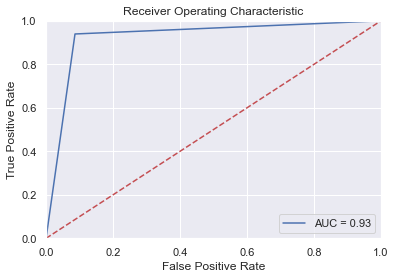

In [112]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_wv, tpr_wv, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

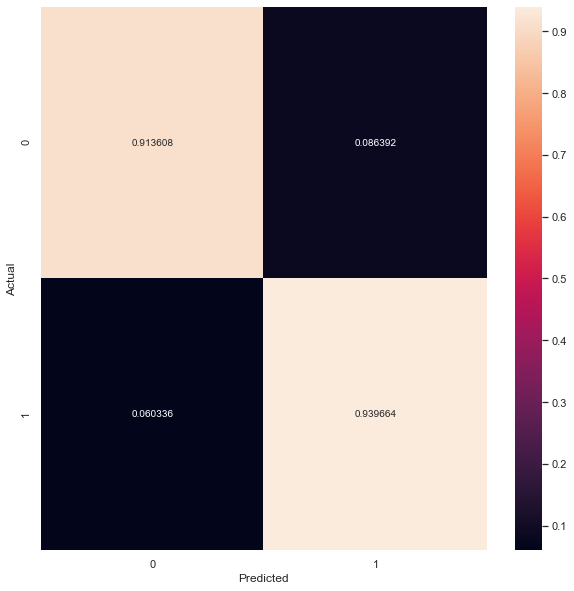

In [113]:
conf_mat = confusion_matrix(y_test_wv, y_predict_lr_wv)
conf_mat = conf_mat / conf_mat.astype(np.float).sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [114]:
import joblib
from joblib import dump

In [115]:
filename = 'finalized_model.sav'
joblib.dump(LR_model_wv, filename)

['finalized_model.sav']

We attained three models that comprise of the actual and predicted scores of the word-turned-vectors showing different correlations for each review. The first one is a Naive Bayes with TF-IDF  where it produced a positive value of 0.9475, a negative value of 0.8716, and an average score of 0.91. The second one is a Logistic Regression with TF IDF. This one produced a positive value of 0.9409, a negative value of 0.9259, and an average score of 0.93. The third and last model is a logistic regression model using Word2Vec. This one produced a positive value of 0.9399, a negative value of 0.9128, and an average score of 0.93. 



Based on the output of the three models built, it appears that the  Logistic Regression with TF IDF model has a better accuracy and balance of positive to negative text. While the accuracy score of this one is the same as the third model, the second model edges out in terms of positive accuracy.   


### Deployment
The model developed provides a plain demonstration for the interested third parties. This model has the potential to be used to aid hotels and sites that provide hospitality services in taking reviews from customers on the experience they have had in their hotel stays. However, the model does not hold much of its use of interactivity considering the lack of accuracy and latency.

Since the Hotel Reviews dataset was gathered in the span of two years. It is significant to update it like a consensus every four to five years in order to attain standards of ethical research. This involves running as many backend instances as possible in order to finetune scalability. With the utilization of Python, the Dash app developed would be the appropriate deployment method in gathering new data. Our app is also created to cater to the marketing experts and analysts who would like to use it for their analysis and insight of topics as such as of the dataset.


The model developed in this project was utilized to create the Dash App. The coding for this application can be found on Github

Dash App will using the Vader sentiment analyser to do life analysis for the complains in addtion to using the insights from the Word2Vector to help the marketing team to extract the common issues the Hotels are facing 

